In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples= n_samples,
                    noise=0.03,
                    random_state=42)

print(f"5 primeras instancias de X: \n {X[:5]}")
print(f"5 primeras instancias de Y: \n {y[:5]}")

5 primeras instancias de X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
5 primeras instancias de Y: 
 [1 1 1 1 0]


### Pasarlo a un DataFrame de Pandas

In [2]:
import pandas as pd

circles = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'y': y
})
circles

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


### Visualizar los datos con MatPlotLib

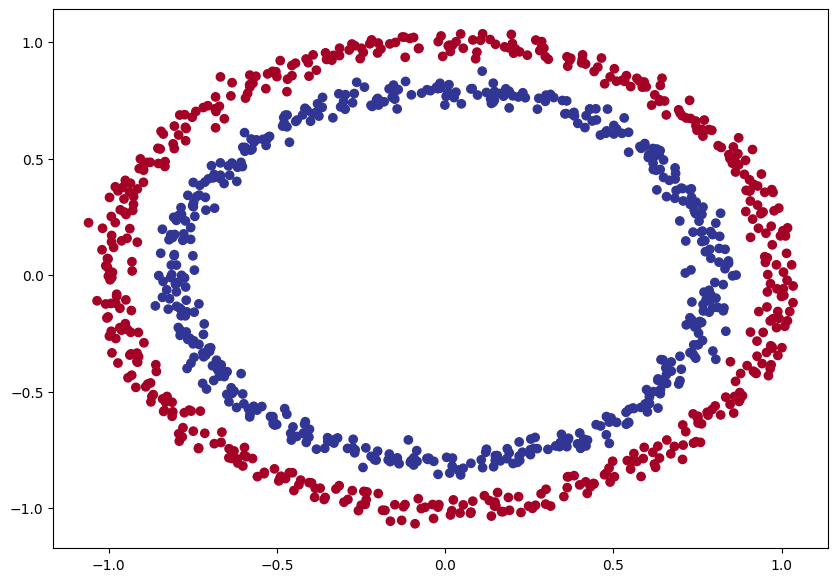

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(x=circles['X1'], y=circles['X2'], c=circles['y'], cmap=plt.cm.RdYlBu)

### Comprobar input/output shape

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [8]:
import torch
tensor_X = torch.from_numpy(X)
tensor_y = torch.from_numpy(y)
tensor_X[:5], tensor_y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]], dtype=torch.float64),
 tensor([1, 1, 1, 1, 0]))

In [10]:
### Separa entre Train y Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tensor_X, tensor_y, train_size=0.8, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [12]:
### Crear un modelo

import torch
from torch import nn

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [13]:
class NNClas(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, X: torch.Tensor):
        return self.layer_2(self.layer_1(X))

In [15]:
model = NNClas().to(device)
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.4056, -0.1580],
                      [-0.5909,  0.1754],
                      [ 0.4950,  0.1035],
                      [-0.0329,  0.6299],
                      [ 0.0625, -0.4199]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.6409,  0.6802,  0.1215,  0.6117, -0.6333], device='cuda:0')),
             ('layer_2.weight',
              tensor([[0.1797, 0.2019, 0.3457, 0.3048, 0.2439]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2768], device='cuda:0'))])

### Creación del modelo con Sequential

In [16]:
model_s = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_s.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6210,  0.2474],
                      [ 0.2174,  0.4994],
                      [-0.1602,  0.1176],
                      [ 0.5709,  0.2498],
                      [ 0.2130, -0.1819]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0843, -0.1128, -0.5166,  0.0765,  0.4249], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1101,  0.4257,  0.4177,  0.3003, -0.1852]], device='cuda:0')),
             ('1.bias', tensor([0.1681], device='cuda:0'))])